<a href="https://colab.research.google.com/github/Akshayakrishna262/mlapplications/blob/main/Multi_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd
uploaded = files.upload()
df=list(uploaded.keys())[0]

Saving Cars(ad).csv to Cars(ad).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
Cars=list(uploaded.keys())[0]
print(Cars)

Saving Cars(ad).csv to Cars(ad) (1).csv
Cars(ad) (1).csv


In [ ]:
df.shape

In [ ]:
df=pd.read_csv(Cars)
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
df.corr(numeric_only=True)

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
#build model
import statsmodels.formula.api as smf


model=smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

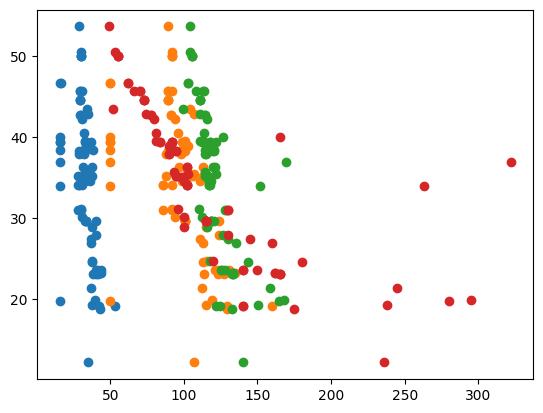

In [ ]:
#add scatter plots for the above code
import matplotlib.pyplot as plt
plt.scatter(df['WT'],df['MPG'])
plt.scatter(df['VOL'],df['MPG'])
plt.scatter(df['SP'],df['MPG'])
plt.scatter(df['HP'],df['MPG'])

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP', data=Cars).fit()

In [ ]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
(model.rsquared, model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [ ]:
ml_v=smf.ols('MPG~VOL+SP+HP',data=df).fit()

print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    2.068548
VOL         -8.928340
SP           2.570678
HP          -5.353199
dtype: float64 
 Intercept    4.194554e-02
VOL          1.648229e-13
SP           1.207855e-02
HP           8.644870e-07
dtype: float64


In [ ]:
(ml_v.rsquared, ml_v.rsquared_adj)

(0.770368341321302, 0.7614216533208333)

In [ ]:
ml_w=smf.ols('MPG-WT', data = Cars).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

In [ ]:
rsq_hp = smf.ols('HP~WT+VOL+SP', data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP', data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP', data=df).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP', data=df).fit().rsquared
vif_sp = 1/(1-rsq_sp)

In [ ]:
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

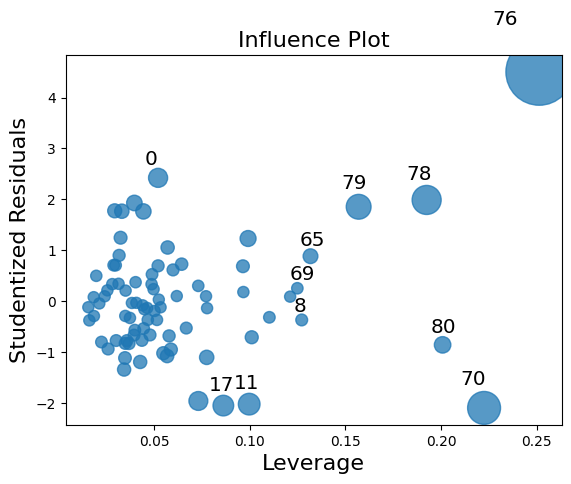

In [ ]:
import statsmodels.api as sm
aaplet=sm.graphics.influence_plot(model)



In [ ]:
#RESIDUAL PLOT FOR HOMOSCEDASITICITY
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

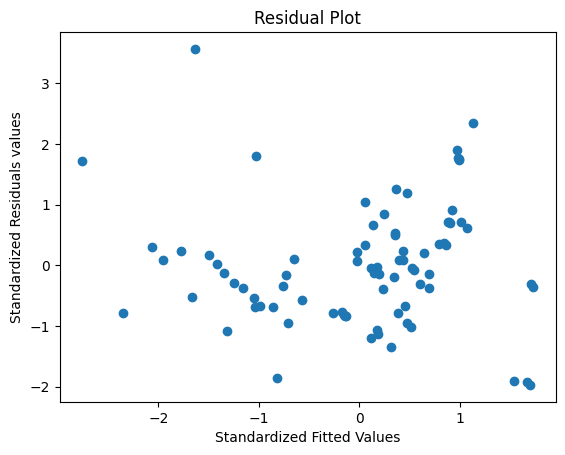

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals values')
plt.show()

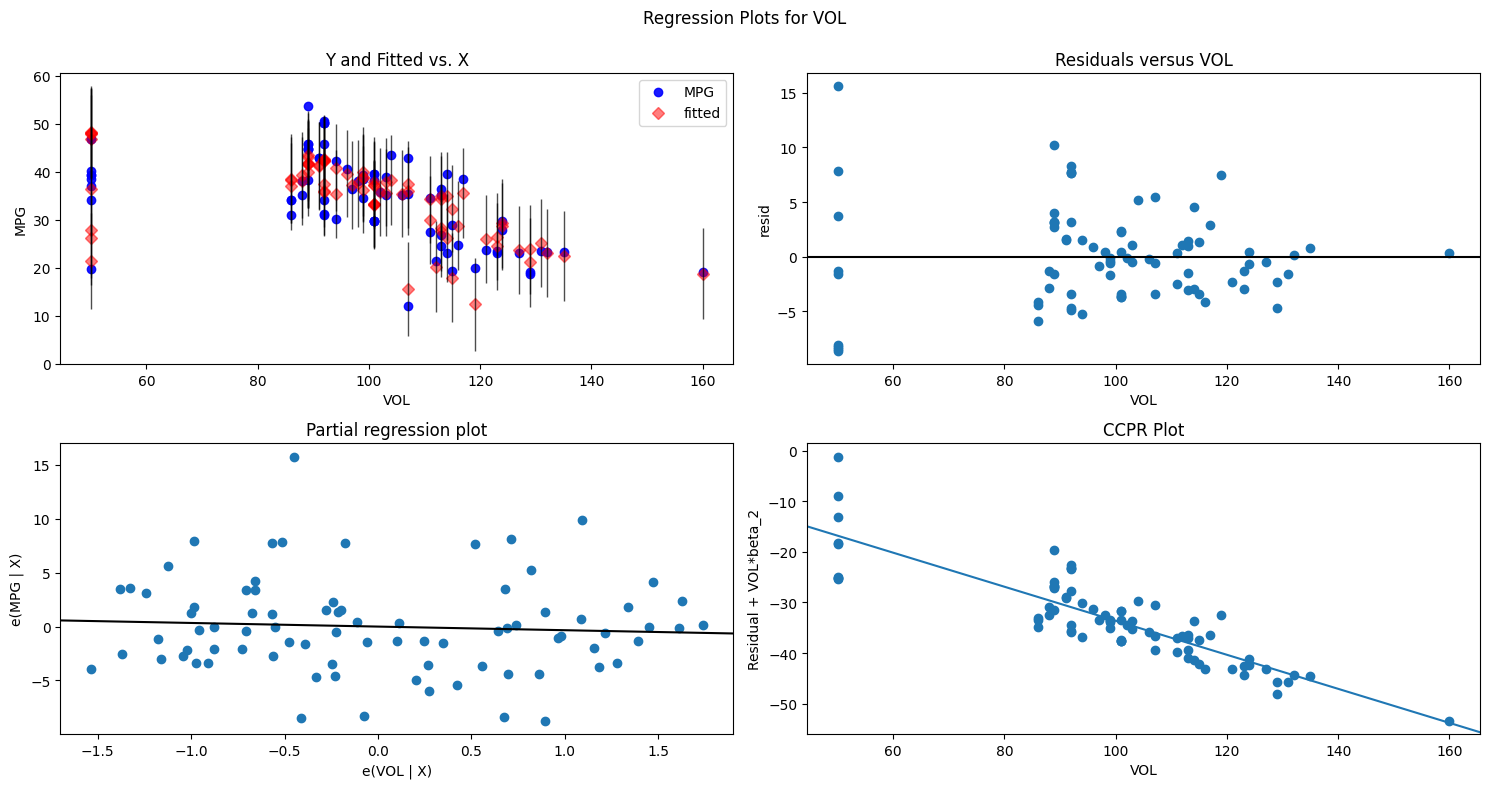

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

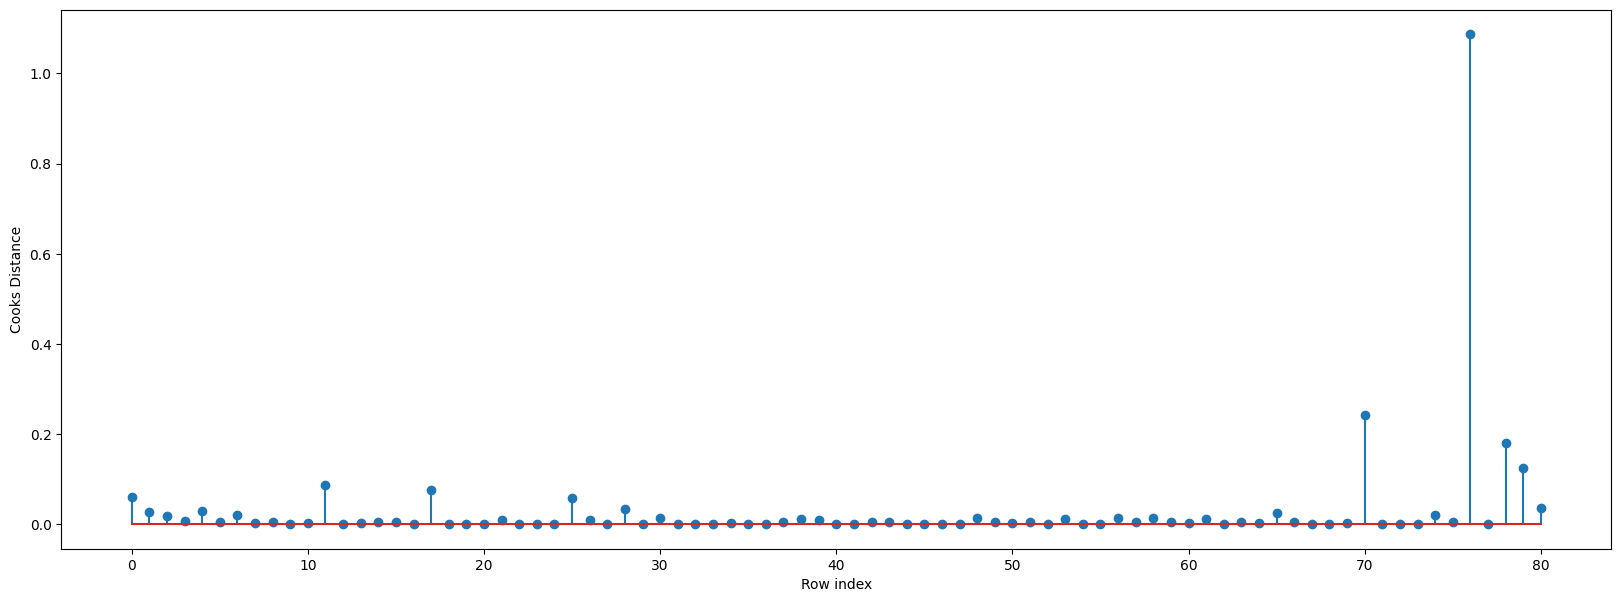

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7)) # Corrected: Use fig, ax = ...
plt.stem(np.arange(len(df)), np.round(c, 3)) # Changed Cars to df
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
model

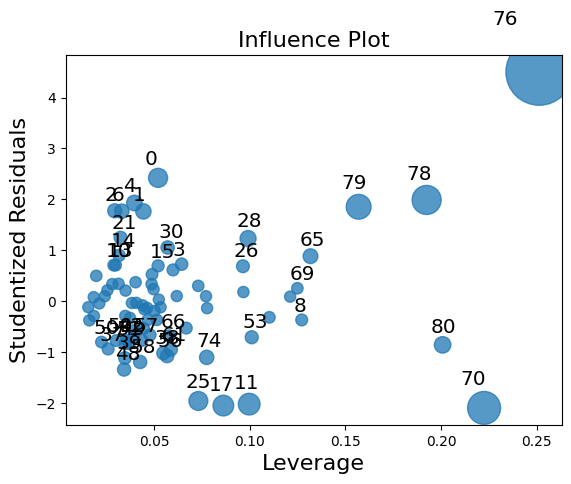

In [ ]:
#high influencial ponits
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model, alpha=0.5)
plt.show()

In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd
uploaded = files.upload()
df=list(uploaded.keys())[0]

Saving Cars(ad).csv to Cars(ad).csv


In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
Cars_new = pd.read_csv(file_name)

Saving Cars(ad).csv to Cars(ad) (1).csv


In [ ]:
Car1=Cars_new.drop(Cars_new.index[[70,76]],axis=0).reset_index()


In [ ]:
Car1=Car1.drop(['index'],axis=1)

In [ ]:
Car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [ ]:
Car2=Car1.drop(Car1.index[[76,77]],axis=0)

In [ ]:
Car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#BUILD A MODEL
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = Car2).fit()

In [ ]:
final_ml_V.rsquared,final_ml_V.aic

(0.8669636111859063, 409.4153062719508)

In [ ]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = Car1).fit()

In [ ]:
final_ml_V.rsquared,final_ml_V.aic

(0.8161692010376008, 446.1172263944772)

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

ValueError: could not broadcast input array from shape (79,) into shape (77,)

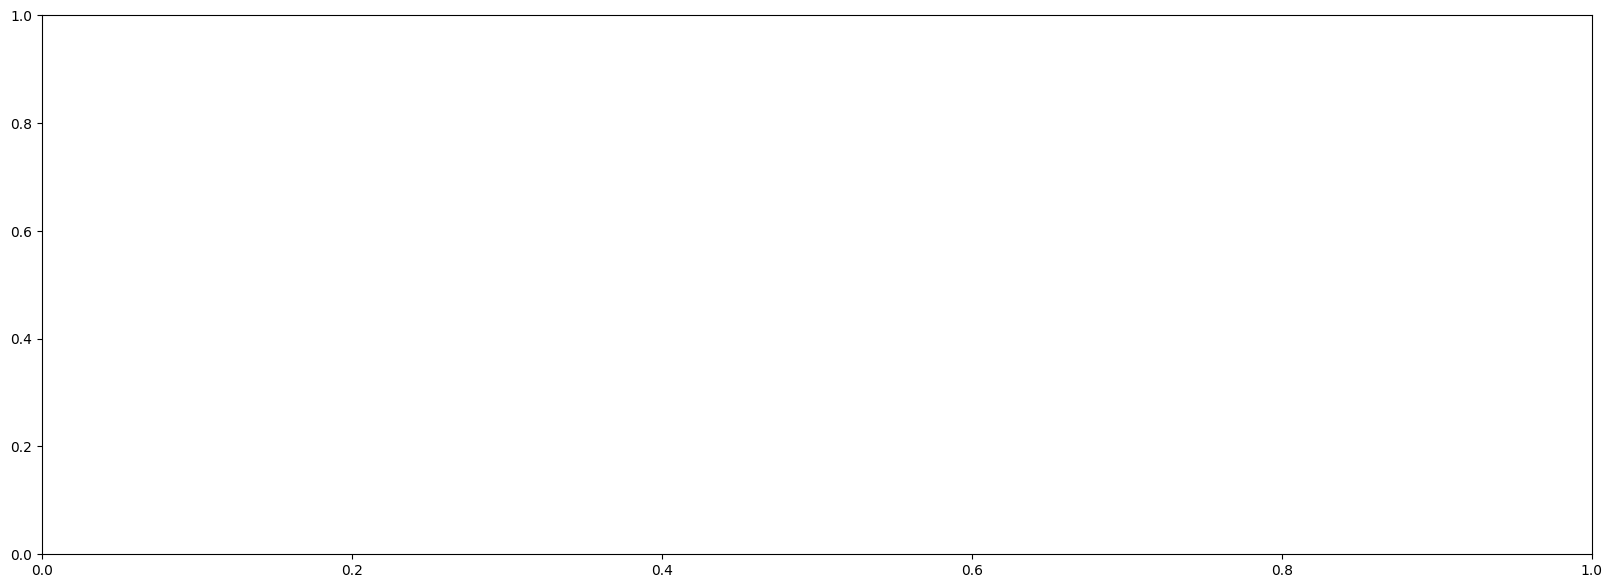

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Car2)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

(np.argmax(c_v),np.max(c_V))
Car2=Car1.drop(Car1.index[[76,77]],axis=0)

In [ ]:
k = Cars.shape[1]
n = Cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

NameError: name 'Cars' is not defined

In [ ]:
Cars[Cars.index.isin([70, 76])]

NameError: name 'Cars' is not defined

In [ ]:
Cars.head()

AttributeError: 'str' object has no attribute 'head'